In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os

import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\frans\Downloads\MarmaladeBoy_Script.csv", names=["index","episode","scene","character","dialogue"], header=None)

In [3]:
df.drop(0,inplace=True)

In [4]:
df2 = pd.DataFrame(df.character.value_counts()).iloc[:20]

In [5]:
df2

,character
Miki Koishikawa,831
Yuu Matsuura,452
Ginta Suou,225
Meiko Akizuki,147
Arimi Suzuki,147
Tsutomu Rokutanda,98
Jin Koishikawa,59
Takuji Kijima,54
Chiyako Koishikawa,51
Rumi Matsuura,50


In [6]:
trace = go.Bar(y=df2.character, x=df2.index,  marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)

In [7]:
fig = make_subplots(rows=1, cols=1,horizontal_spacing=1, subplot_titles=("Marmalade Boy"))

In [8]:
fig.append_trace(trace, 1, 1)

In [9]:
fig['layout'].update(showlegend=False ,height=800,title="Número de dialogos según el personaje",paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)')

iplot(fig)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from nltk.probability import FreqDist

In [11]:
description_list=[]
for description in df.dialogue:
    # regex pattern
    description=re.sub("[^A-Za-z_ÑñÁáÉéÍíÓóÚú]+", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("spanish"))]
    lemma=nlp.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)

In [12]:
df["new_script"]=description_list
df

,index,episode,scene,character,dialogue,new_script
1,1,1,1,Miki Koishikawa,Con Meiko,meiko
2,2,1,1,Miki Koishikawa,Después de las actividades del club me detuve ...,después actividades club detuve cafetería yoko...
3,3,1,1,Miki Koishikawa,Y resulto que en la mesa de al lado había un c...,resulto mesa lado chico guapísimo
4,4,1,1,Miki Koishikawa,Pero su novia vino enseguida,novia vino enseguida
5,5,1,1,Miki Koishikawa,Lo que me desilusionó bastante,desilusionó bastante
...,...,...,...,...,...,...
2298,2298,10,434,Miki Koishikawa,¿Pero no es?,
2299,2299,10,435,Rumi Matsuura,Decidas lo que decidas estará bien,decidas decidas bien
2300,2300,10,435,Chiyako Koishikawa,"Si, no debemos obligarte a nada",si debemos obligarte
2301,2301,10,435,Jin Koishikawa,Pero no te preocupes,preocupes


In [13]:
fdist = FreqDist(description_list)
fdist

FreqDist({'': 58, 'miki': 21, 'si': 18, 'verdad': 13, 'ginta': 10, 'yuu': 9, 'bien': 9, 'arimi': 8, 'buenas tardes': 7, 'gracias': 7, ...})

In [14]:
fdist.most_common(50)

[('', 58),
 ('miki', 21),
 ('si', 18),
 ('verdad', 13),
 ('ginta', 10),
 ('yuu', 9),
 ('bien', 9),
 ('arimi', 8),
 ('buenas tardes', 7),
 ('gracias', 7),
 ('va', 7),
 ('vale', 6),
 ('hola', 6),
 ('ah', 5),
 ('buenos días', 5),
 ('pasa', 5),
 ('meiko', 4),
 ('veo', 4),
 ('claro', 4),
 ('rico', 4),
 ('bueno', 4),
 ('pues', 4),
 ('parece', 4),
 ('hablar', 4),
 ('broma', 3),
 ('ver', 3),
 ('cómo', 3),
 ('luego', 3),
 ('tampoco', 3),
 ('ah perdona', 3),
 ('idiota', 3),
 ('sé', 3),
 ('asunto', 3),
 ('dice', 3),
 ('entonces', 3),
 ('tsutomu rokutanda', 3),
 ('primo', 3),
 ('genial', 3),
 ('ah si', 3),
 ('hacer', 2),
 ('guapo', 2),
 ('importa', 2),
 ('increíble', 2),
 ('eh miki', 2),
 ('creo', 2),
 ('adiós', 2),
 ('gusta', 2),
 ('embargo', 2),
 ('entiendo', 2),
 ('bueno luego', 2)]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 

max_features = 50

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

print("{} palabras más comunes: {}".format(max_features,count_vectorizer.get_feature_names_out()))

50 palabras más comunes: ['ah' 'ahora' 'aquí' 'arimi' 'así' 'bien' 'bueno' 'casa' 'chica' 'chico'
 'claro' 'creo' 'cómo' 'eh' 'entonces' 'espera' 'ginta' 'gracias' 'gusta'
 'hacer' 'hecho' 'matsuura' 'mejor' 'miki' 'nunca' 'oye' 'padre' 'parece'
 'pasa' 'puede' 'puedo' 'pues' 'quieres' 'quiero' 'quién' 'sabes' 'ser'
 'si' 'siempre' 'solo' 'sé' 'tan' 'va' 'vamos' 'vaya' 'ver' 'verdad' 'vez'
 'voy' 'yuu']


In [16]:
speaker_scene_count = {}
for name,df in df.groupby(['episode','scene']):
    for speaker_name in df.character.unique().tolist():
        if speaker_name in speaker_scene_count.keys():
            speaker_scene_count[speaker_name][0]+=1
            speaker_scene_count[speaker_name][1]+= df.character.tolist().count(speaker_name)
        else:
            speaker_scene_count[speaker_name] = []
            speaker_scene_count[speaker_name].append(1)
            speaker_scene_count[speaker_name].append(df.character.tolist().count(speaker_name))
scene_count = {k: v for k, v in sorted(speaker_scene_count.items(), key=lambda item: item[1],reverse = True)}
# pd.Series(scene_count).head(20).plot(kind='bar')
scene_count

{'Miki Koishikawa': [262, 831],
 'Yuu Matsuura': [123, 452],
 'Ginta Suou': [90, 225],
 'Arimi Suzuki': [52, 147],
 'Meiko Akizuki': [50, 147],
 'Tsutomu Rokutanda': [28, 98],
 'Chiyako Koishikawa': [22, 51],
 'Rumi Matsuura': [22, 50],
 'Namura': [19, 34],
 'Jin Koishikawa': [18, 59],
 'Takuji Kijima': [15, 54],
 'Youji Matsuura': [14, 22],
 "Miki's friend": [10, 23],
 'Ryoko Momoi': [9, 15],
 'Customer': [8, 15],
 'Student': [7, 13],
 'Tennis Official': [6, 7],
 'Satoshi Miwa': [5, 27],
 "Ginta's friend": [4, 6],
 'Reporter': [2, 12],
 'All fathers': [2, 4],
 "Ginta's friends": [2, 2],
 "Tsutomu's friend": [2, 2],
 "Miki's friends": [1, 3],
 "Miki's fathers": [1, 1],
 "Yuu's fathers": [1, 1],
 "Arimi's boyfriend": [1, 1]}

In [17]:
df_scenes_lines = pd.DataFrame(scene_count)
df_scenes_lines = df_scenes_lines.T
df_scenes_lines.columns = ['# of Scenes','# of lines spoken']
df_scenes_lines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Miki Koishikawa to Arimi's boyfriend
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   # of Scenes        27 non-null     int64
 1   # of lines spoken  27 non-null     int64
dtypes: int64(2)
memory usage: 648.0+ bytes


<AxesSubplot:xlabel='# of lines spoken'>

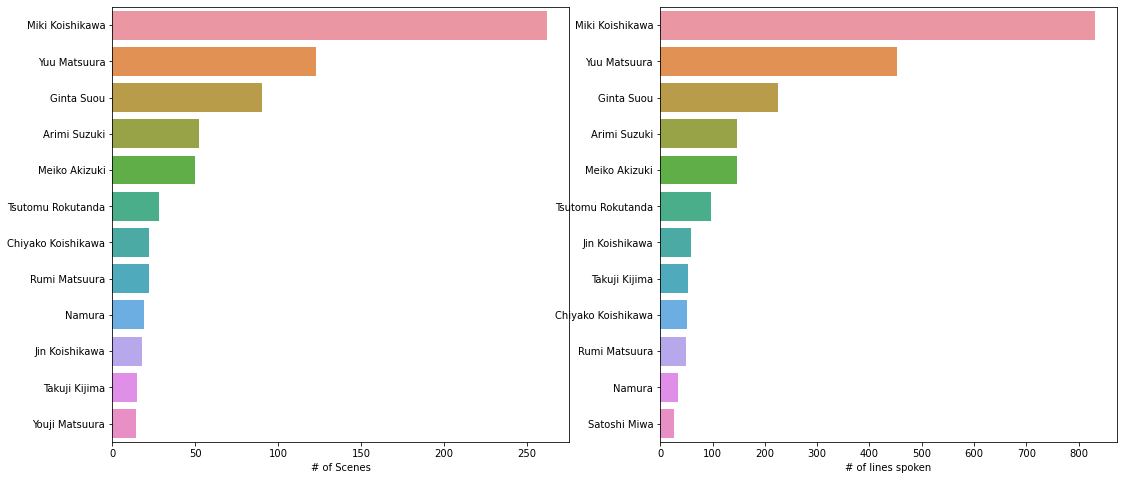

In [18]:
df_scenes_lines['# of lines per scene'] = df_scenes_lines['# of lines spoken']/df_scenes_lines['# of Scenes']
num = 12
f, axes = plt.subplots(1, 2,figsize=(18,8))
scenes = df_scenes_lines['# of Scenes'].sort_values(ascending=False).head(num)
scenes_character = [ x.title() for x in df_scenes_lines['# of Scenes'].sort_values(ascending=False).head(num).index]

sns.barplot(x=scenes,y=scenes_character, ax=axes[0])
lines_spoken = df_scenes_lines['# of lines spoken'].sort_values(ascending=False).head(num)
lines_spoken_character = [ x.title() for x in df_scenes_lines['# of lines spoken'].sort_values(ascending=False).head(num).index]
sns.barplot(x=lines_spoken,y=lines_spoken_character, ax=axes[1])

In [19]:
df = pd.read_csv(r"C:\Users\frans\Downloads\MarmaladeBoy_Script.csv", names=["index","episode","scene","character","dialogue"], header=None)

In [20]:
char_dict = {}
for group, group_df in df.groupby(['episode','scene']):
#     print(group,group_df)
#     print(group_df['speaker'].sort_values().unique().tolist())
    char_in_scene = str(group_df['character'].sort_values().unique().tolist())[1:-1].replace("'","")
#     print(char_in_scene)
    if char_in_scene in char_dict.keys():
        char_dict[char_in_scene] +=1
    else:
        char_dict[char_in_scene] = 1
        
        
#     break
sorted_dict = {k: v for k, v in sorted(char_dict.items(), key=lambda item: item[1],reverse = True)}
sorted_dict

{'Miki Koishikawa': 110,
 'Miki Koishikawa, Yuu Matsuura': 48,
 'Ginta Suou': 24,
 'Yuu Matsuura': 19,
 'Meiko Akizuki, Miki Koishikawa': 17,
 'Ginta Suou, Miki Koishikawa': 12,
 'Arimi Suzuki, Miki Koishikawa': 12,
 'Arimi Suzuki': 12,
 'Tsutomu Rokutanda': 11,
 'Arimi Suzuki, Ginta Suou': 11,
 'Meiko Akizuki': 8,
 'Chiyako Koishikawa, Jin Koishikawa, Miki Koishikawa, Rumi Matsuura, Youji Matsuura, Yuu Matsuura': 7,
 'Ginta Suou, Yuu Matsuura': 7,
 'Ginta Suou, Meiko Akizuki': 5,
 'Arimi Suzuki, Yuu Matsuura': 5,
 'Tennis Official': 5,
 'Miki Koishikawa, "Mikis friend"': 4,
 '"Mikis friend"': 4,
 'Namura, Ryoko Momoi': 4,
 'Meiko Akizuki, Miki Koishikawa, Yuu Matsuura': 4,
 'Ginta Suou, Tsutomu Rokutanda': 4,
 'Customer': 4,
 'Meiko Akizuki, Yuu Matsuura': 3,
 'Ginta Suou, Meiko Akizuki, Miki Koishikawa': 3,
 'Miki Koishikawa, Takuji Kijima, Yuu Matsuura': 3,
 'Miki Koishikawa, Namura': 3,
 'Arimi Suzuki, Miki Koishikawa, Yuu Matsuura': 3,
 'Arimi Suzuki, Ginta Suou, Miki Koishikawa':

In [21]:
sorted_chars =  sorted(['Miki Koishikawa', 'Yuu Matsuura', 'Meiko Akizuki', 'Ginta Suou', 'Arimi Suzuki', 'Chiyako Koishikawa', 'Rumi Matsuura', 'Youji Matsuura',
       'Jin Koishikawa', 'Satoshi Miwa', 'Namura', 'Ryoko Momoi','Takuji Kijima','Tsutomu Rokutanda'])
sorted_chars

['Arimi Suzuki',
 'Chiyako Koishikawa',
 'Ginta Suou',
 'Jin Koishikawa',
 'Meiko Akizuki',
 'Miki Koishikawa',
 'Namura',
 'Rumi Matsuura',
 'Ryoko Momoi',
 'Satoshi Miwa',
 'Takuji Kijima',
 'Tsutomu Rokutanda',
 'Youji Matsuura',
 'Yuu Matsuura']

In [22]:
relations = [x+', '+y for x in sorted_chars for y in sorted_chars if x != y and x<y]

In [23]:
relations.extend([x+', '+y+', '+z for x in sorted_chars for y in sorted_chars for z in sorted_chars if x<y and y<z])
relations

['Arimi Suzuki, Chiyako Koishikawa',
 'Arimi Suzuki, Ginta Suou',
 'Arimi Suzuki, Jin Koishikawa',
 'Arimi Suzuki, Meiko Akizuki',
 'Arimi Suzuki, Miki Koishikawa',
 'Arimi Suzuki, Namura',
 'Arimi Suzuki, Rumi Matsuura',
 'Arimi Suzuki, Ryoko Momoi',
 'Arimi Suzuki, Satoshi Miwa',
 'Arimi Suzuki, Takuji Kijima',
 'Arimi Suzuki, Tsutomu Rokutanda',
 'Arimi Suzuki, Youji Matsuura',
 'Arimi Suzuki, Yuu Matsuura',
 'Chiyako Koishikawa, Ginta Suou',
 'Chiyako Koishikawa, Jin Koishikawa',
 'Chiyako Koishikawa, Meiko Akizuki',
 'Chiyako Koishikawa, Miki Koishikawa',
 'Chiyako Koishikawa, Namura',
 'Chiyako Koishikawa, Rumi Matsuura',
 'Chiyako Koishikawa, Ryoko Momoi',
 'Chiyako Koishikawa, Satoshi Miwa',
 'Chiyako Koishikawa, Takuji Kijima',
 'Chiyako Koishikawa, Tsutomu Rokutanda',
 'Chiyako Koishikawa, Youji Matsuura',
 'Chiyako Koishikawa, Yuu Matsuura',
 'Ginta Suou, Jin Koishikawa',
 'Ginta Suou, Meiko Akizuki',
 'Ginta Suou, Miki Koishikawa',
 'Ginta Suou, Namura',
 'Ginta Suou, Rumi 

In [24]:
{x:sorted_dict[x]for x in relations if x in sorted_dict.keys()}

{'Arimi Suzuki, Ginta Suou': 11,
 'Arimi Suzuki, Miki Koishikawa': 12,
 'Arimi Suzuki, Yuu Matsuura': 5,
 'Chiyako Koishikawa, Miki Koishikawa': 2,
 'Chiyako Koishikawa, Rumi Matsuura': 2,
 'Ginta Suou, Meiko Akizuki': 5,
 'Ginta Suou, Miki Koishikawa': 12,
 'Ginta Suou, Namura': 1,
 'Ginta Suou, Tsutomu Rokutanda': 4,
 'Ginta Suou, Yuu Matsuura': 7,
 'Meiko Akizuki, Miki Koishikawa': 17,
 'Meiko Akizuki, Satoshi Miwa': 3,
 'Meiko Akizuki, Yuu Matsuura': 3,
 'Miki Koishikawa, Namura': 3,
 'Miki Koishikawa, Rumi Matsuura': 2,
 'Miki Koishikawa, Takuji Kijima': 2,
 'Miki Koishikawa, Yuu Matsuura': 48,
 'Namura, Ryoko Momoi': 4,
 'Namura, Yuu Matsuura': 1,
 'Satoshi Miwa, Yuu Matsuura': 1,
 'Takuji Kijima, Tsutomu Rokutanda': 1,
 'Arimi Suzuki, Ginta Suou, Miki Koishikawa': 3,
 'Arimi Suzuki, Ginta Suou, Yuu Matsuura': 1,
 'Arimi Suzuki, Miki Koishikawa, Yuu Matsuura': 3,
 'Chiyako Koishikawa, Jin Koishikawa, Rumi Matsuura': 1,
 'Chiyako Koishikawa, Miki Koishikawa, Yuu Matsuura': 1,
 'Gi

In [25]:
final_dict  = {k: v for k, v in sorted({x:sorted_dict[x]for x in relations if x in sorted_dict.keys()}.items(), key=lambda item: item[1],reverse = True)}
final_dict

{'Miki Koishikawa, Yuu Matsuura': 48,
 'Meiko Akizuki, Miki Koishikawa': 17,
 'Arimi Suzuki, Miki Koishikawa': 12,
 'Ginta Suou, Miki Koishikawa': 12,
 'Arimi Suzuki, Ginta Suou': 11,
 'Ginta Suou, Yuu Matsuura': 7,
 'Arimi Suzuki, Yuu Matsuura': 5,
 'Ginta Suou, Meiko Akizuki': 5,
 'Ginta Suou, Tsutomu Rokutanda': 4,
 'Namura, Ryoko Momoi': 4,
 'Meiko Akizuki, Miki Koishikawa, Yuu Matsuura': 4,
 'Meiko Akizuki, Satoshi Miwa': 3,
 'Meiko Akizuki, Yuu Matsuura': 3,
 'Miki Koishikawa, Namura': 3,
 'Arimi Suzuki, Ginta Suou, Miki Koishikawa': 3,
 'Arimi Suzuki, Miki Koishikawa, Yuu Matsuura': 3,
 'Ginta Suou, Meiko Akizuki, Miki Koishikawa': 3,
 'Miki Koishikawa, Takuji Kijima, Yuu Matsuura': 3,
 'Chiyako Koishikawa, Miki Koishikawa': 2,
 'Chiyako Koishikawa, Rumi Matsuura': 2,
 'Miki Koishikawa, Rumi Matsuura': 2,
 'Miki Koishikawa, Takuji Kijima': 2,
 'Ginta Suou, Tsutomu Rokutanda, Yuu Matsuura': 2,
 'Jin Koishikawa, Miki Koishikawa, Rumi Matsuura': 2,
 'Ginta Suou, Namura': 1,
 'Namur

In [26]:
x = final_dict.copy()
for key in x.keys():
    keys = key.split(', ')
    if len(keys)==3:
        if keys[0]+', '+keys[1] in x.keys():
            final_dict[keys[0]+', '+keys[1]] +=1
        else:
            final_dict[keys[0]+', '+keys[1]]=1
            
        if keys[0]+', '+keys[2] in x.keys():
            final_dict[keys[0]+', '+keys[2]] +=1
        else:
            final_dict[keys[0]+', '+keys[2]]=1
        
        if keys[1]+', '+keys[2] in x.keys():
            final_dict[keys[1]+', '+keys[2]] +=1
        else:
            final_dict[keys[1]+', '+keys[2]]=1

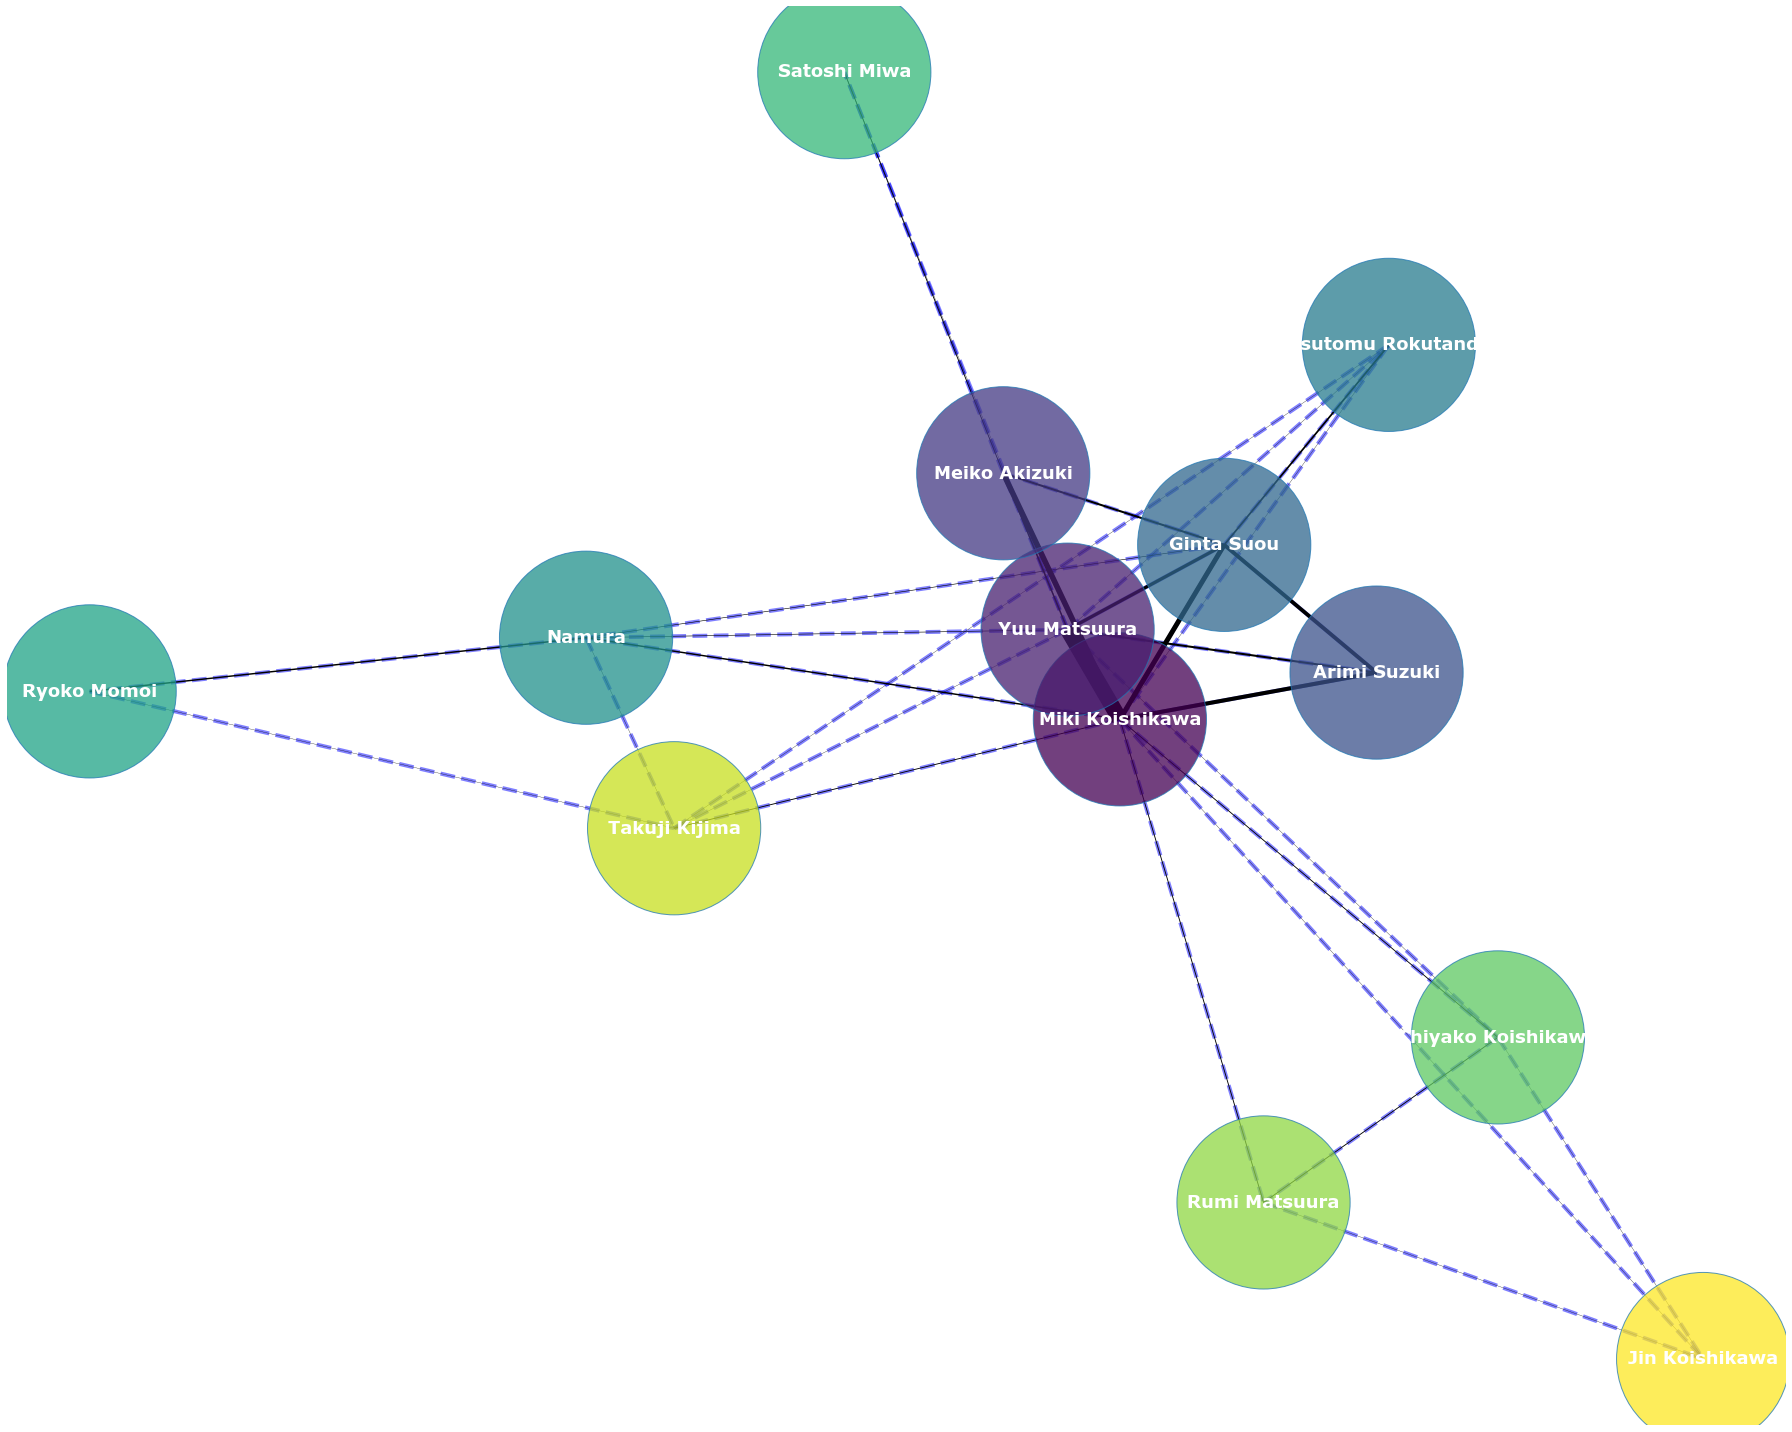

In [27]:

import networkx as nx
plt.figure(figsize=(25,20))
G = nx.Graph()
i=1
list_d = final_dict.keys()
for key in list_d:
    if len(key.split(','))==2:
        key1,key2 = key.split(',')
        key1,key2 = key1.strip(),key2.strip()
    #     print(key1,key2)
        G.add_edge(key1.strip(), key2.strip(), weight=final_dict[key])
        i+=1
        
        
        
options = {"edgecolors": "tab:blue", "node_size": 30000, "alpha": 0.75}

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 10]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 10]

# positions for all nodes
pos = nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G, pos, node_color=range(13), **options)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4, alpha=0.5, edge_color='blue')
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='blue', style='dashed')

all_weights=[]
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))
for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(sorted_chars)*4.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


# labels
nx.draw_networkx_labels(G, pos, font_size=18, font_family='verdana',font_weight='bold',font_color='white')

ax = plt.gca()
ax.margins(0.001)

plt.tight_layout()
plt.axis('off')

plt.show()
